* Calculate Rossby deformration radius based on normal mode decomposition

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools, psu_tools)
import datetime, os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import interpolate
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
%matplotlib inline

In [2]:
octnowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
octnowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
octnowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')

In [3]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
e3t = mesh.variables['e3t'][0,:,380:510,240:397]
e1t = mesh.variables['e1t'][0,380:510,240:397]
e2t = mesh.variables['e2t'][0,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [4]:
S = octnowind_T.variables['vosaline']
T = octnowind_T.variables['votemper']
DEPTH = octnowind_T.variables['deptht']

In [5]:
S_ave = np.nanmean(S[408:480,:,458-380,279-240], axis = 0)
T_ave = np.nanmean(T[408:480,:,458-380,279-240], axis = 0)
rho =psu_tools.calculate_density(T_ave,S_ave)

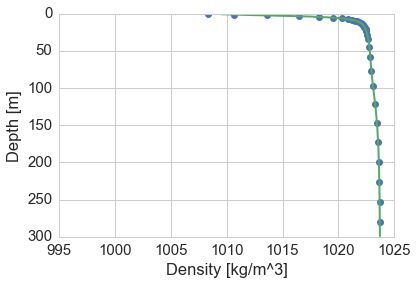

In [6]:
fF = interpolate.interp1d( DEPTH[:],rho)
DEPTH_more = np.arange(1,300)
rho_more = fF(DEPTH_more)   # use interpolation function returned by `interp1d`
plt.plot(rho, DEPTH, 'o', rho_more, DEPTH_more, '-')
plt.ylim([300,0])
plt.ylabel('Depth [m]')
plt.xlabel('Density [kg/m^3]')

In [7]:
po_rho = rho_more-1000 ## transform to potential density
with open('/ocean/jieliu/courses/512/sg0318005.f10t', 'w') as f:
    for dep, Po_rho in zip(DEPTH_more, po_rho):
        f.writelines( '%i %s \n' %(dep, Po_rho) )

(300, 0)

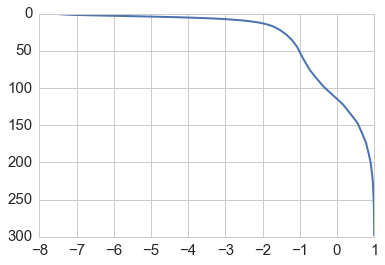

In [9]:
text = np.loadtxt('/ocean/jieliu/courses/512/assign4.dat')
plt.plot(text[:,1],text[:,0])
plt.ylim(300,0)

In [11]:
Rd = 7328
print('Rossby deformation radius of grid point in the central strait is ', Rd/1000, ' km')

Rossby deformation radius of grid point in the central strait is  7.328  km


In [20]:
bathy,X,Y = tidetools.get_SS2_bathy_data()
geo_tools.find_closest_model_point(-123.3,49.2,X,Y,land_mask=bathy.mask)

(446, 305)